In [1]:
# Dataset with columns representing various features and a target variable (TenYearCHD) for 
# binary classification. You can use logistic regression to predict whether someone is at 
# risk of coronary heart disease (CHD) based on these features.

In [2]:
# IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
PATH = 'framingham.csv'
data = pd.read_csv(PATH)

In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# FILL MISSING VALUES
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['cigsPerDay'].fillna(data['cigsPerDay'].median(), inplace=True)
data['BPMeds'].fillna(data['BPMeds'].median(), inplace=True)
data['totChol'].fillna(data['totChol'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)
data['heartRate'].fillna(data['heartRate'].median(), inplace=True)
data['glucose'].fillna(data['glucose'].mean(), inplace=True)


In [6]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
# or we can do df.dropna(inplace=True)

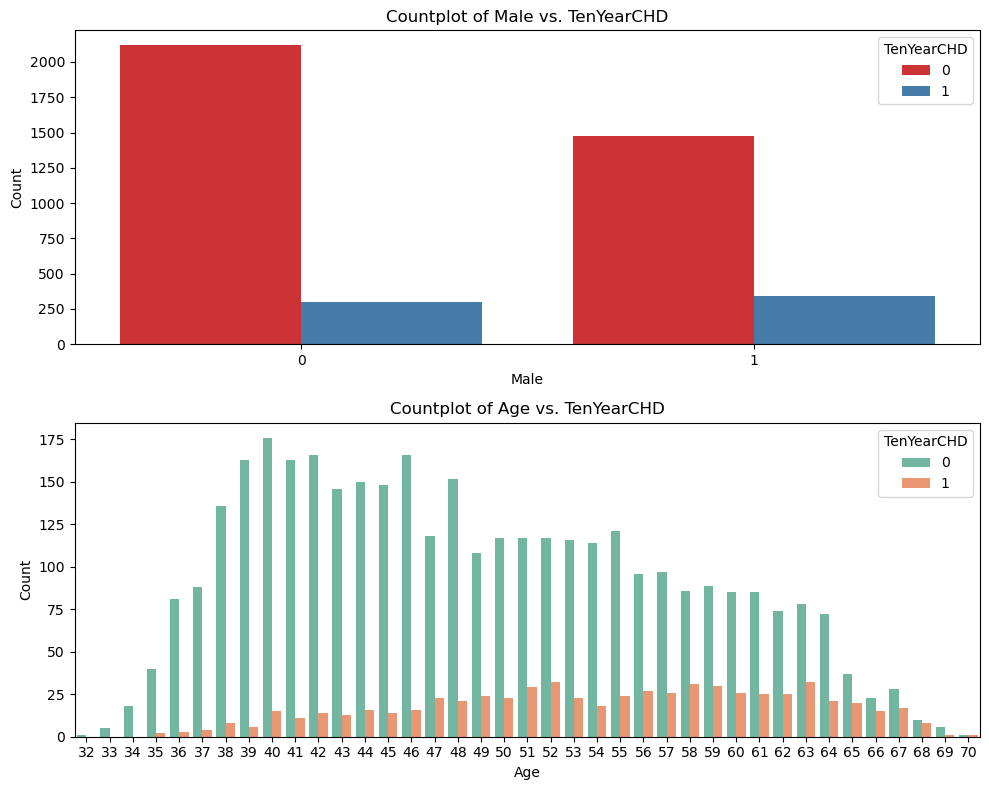

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the countplot for 'male' vs. 'TenYearCHD' in the first subplot
sns.countplot(x='male', hue='TenYearCHD', data=df, ax=ax1, palette='Set1')
ax1.set_title('Countplot of Male vs. TenYearCHD')
ax1.set_xlabel('Male')
ax1.set_ylabel('Count')

# Plot the countplot for 'age' vs. 'TenYearCHD' in the second subplot
sns.countplot(x='age', hue='TenYearCHD', data=df, ax=ax2, palette='Set2')
ax2.set_title('Countplot of Age vs. TenYearCHD')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

# Adjust the space between subplots for better readability
plt.tight_layout()

# Show the figure
plt.show()


In [10]:
# The code helps visualize how the risk of Ten-Year Coronary Heart Disease varies with 
# gender ('male') and age ('age') by showing the distribution of high and low-risk categories 
# in each variable. The improved version of the code includes better labels, titles,
# and layout adjustments for enhanced visualization.

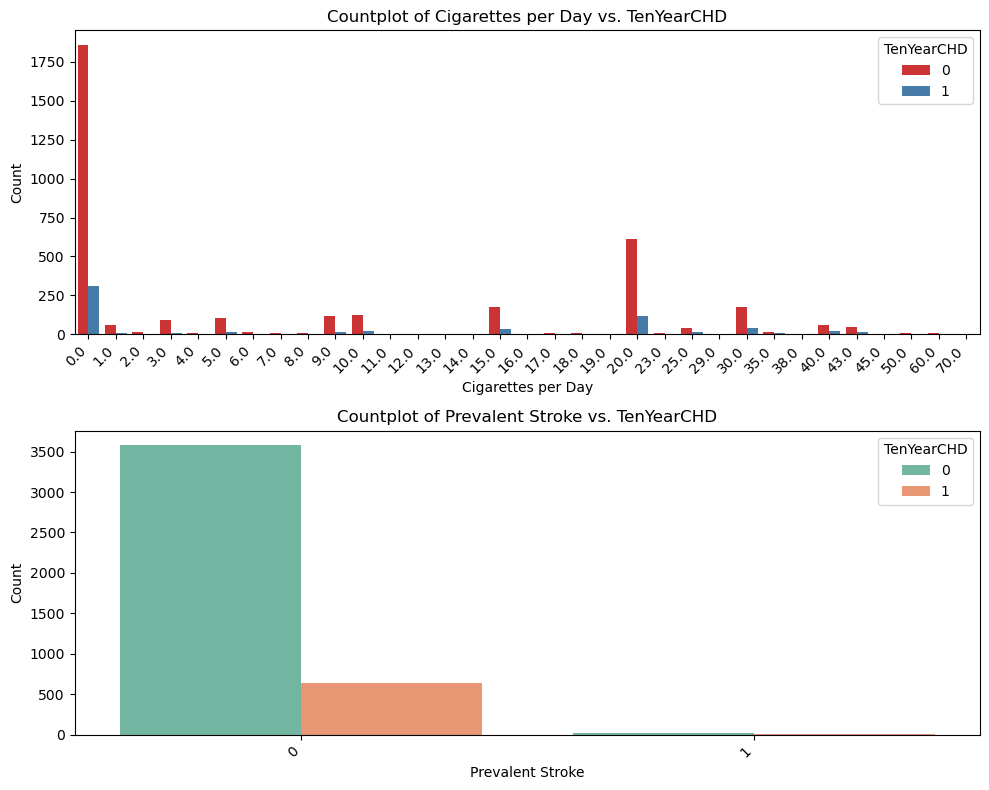

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the countplot for 'cigsPerDay' vs. 'TenYearCHD' in the first subplot
sns.countplot(x='cigsPerDay', hue='TenYearCHD', data=df, ax=ax1, palette='Set1')
ax1.set_title('Countplot of Cigarettes per Day vs. TenYearCHD')
ax1.set_xlabel('Cigarettes per Day')
ax1.set_ylabel('Count')

# Rotate x-axis labels for better spacing
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

# Plot the countplot for 'prevalentStroke' vs. 'TenYearCHD' in the second subplot
sns.countplot(x='prevalentStroke', hue='TenYearCHD', data=df, ax=ax2, palette='Set2')
ax2.set_title('Countplot of Prevalent Stroke vs. TenYearCHD')
ax2.set_xlabel('Prevalent Stroke')
ax2.set_ylabel('Count')

# Rotate x-axis labels for better spacing
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust the space between subplots for better readability
plt.tight_layout()

# Show the figure
plt.show()



In [ ]:
# These countplots help visualize how the risk of Ten-Year Coronary Heart Disease is influenced
# by the number of cigarettes smoked per day and the presence of a prevalent stroke
# in the dataset.

In [13]:

X = data[["male","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
y = data[["TenYearCHD"]]

In [15]:
# Now, let's say you want to use this dataset to make predictions using a machine learning algorithm.
# Some algorithms, like distance-based ones (e.g., k-nearest neighbors), are sensitive to the scale
# of the input features. In this case, "Income" has a much larger range than "Age," which could cause 
# the algorithm to give too much importance to "Income."

# Feature scaling is a technique used to make sure that all features have similar scales. One common
# method is standardization, which transforms the data so that it has a mean (average) of 0 and a standard
# deviation of 1 for each feature.

In [16]:
# Purpose of Feature Scaling: The primary purpose of feature scaling is to ensure that the 
#     features have similar scales, which can help certain machine learning algorithms work
#     effectively. Algorithms that rely on distances, gradients, or the magnitude of features, such as
#     k-nearest neighbors, support vector machines, and principal component analysis (PCA),
#     benefit from feature scaling

In [19]:
from sklearn import preprocessing, metrics
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
# X_train: This is the training set containing the feature data (independent variables) on which the model will be trained.
# y_train.values.ravel(): This is the corresponding target data (dependent variable or labels)
#     for the training set. The .values attribute is used to extract the values from the Pandas
#     Series, and .ravel() is used to convert the resulting array into a 1D array. Logistic regression
#     expects the target variable
#     to be a 1D array.

In [22]:
LR = LogisticRegression().fit(X_train, y_train.values.ravel())

In [23]:
y_pred = LR.predict(X_test)

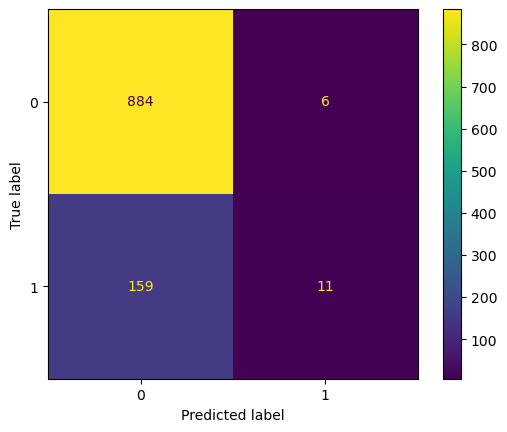

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [25]:
accuracy_score(y_test, y_pred)


0.8443396226415094

In [28]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob

array([[0.92451041, 0.07548959],
       [0.82695637, 0.17304363],
       [0.56499594, 0.43500406],
       ...,
       [0.91530442, 0.08469558],
       [0.73492848, 0.26507152],
       [0.95262452, 0.04737548]])